# EDA for House Price Dataset
- Variable Mapping
- Single Variable Analysis
- Feature Engineering
- Modeling

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import modules.analysis
import pandasql as ps

importlib.reload(modules.analysis)

from modules.analysis import mean_med_std, single_variable_EDA, correlation_comparison, pairwise_eda
from utils.helpers import load_data, remove_matching_rows_concat

In [505]:
# Loading the Dataset
df = load_data('data/Housing.csv')
df_no_outliers = df.copy(deep=True)
print(df.shape)
df.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [506]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [507]:
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

## Single Variable EDA and Mapping Variables

### Price

- Data looks right skewed so median would probably be a better measurement of center

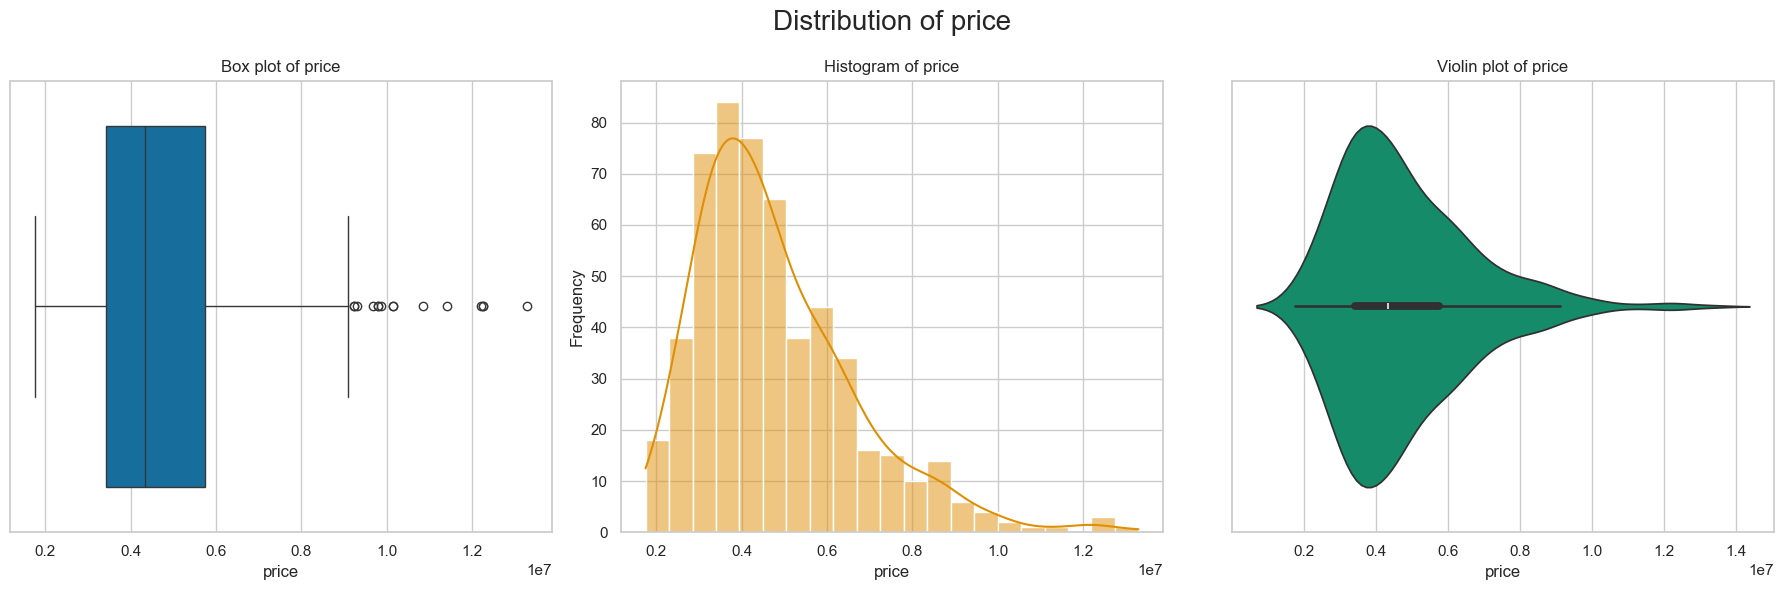

(545, 13) old
The mean price is: 4766729.247706422
The median price is: 4340000.0
The standard deviation of price is: 1870439.6156573922


Outliers in the price column (Empty dataframe if none):
(530, 13) new


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [508]:
single_variable_EDA(df,'price', 'numerical')

print(df_no_outliers.shape, 'old')

outliers_df = mean_med_std(df, 'price')
df_no_outliers = remove_matching_rows_concat(df_no_outliers, outliers_df)

print(df_no_outliers.shape, 'new')

outliers_df


### Area

- Data looks right skewed.
- Standard deviation appears really large

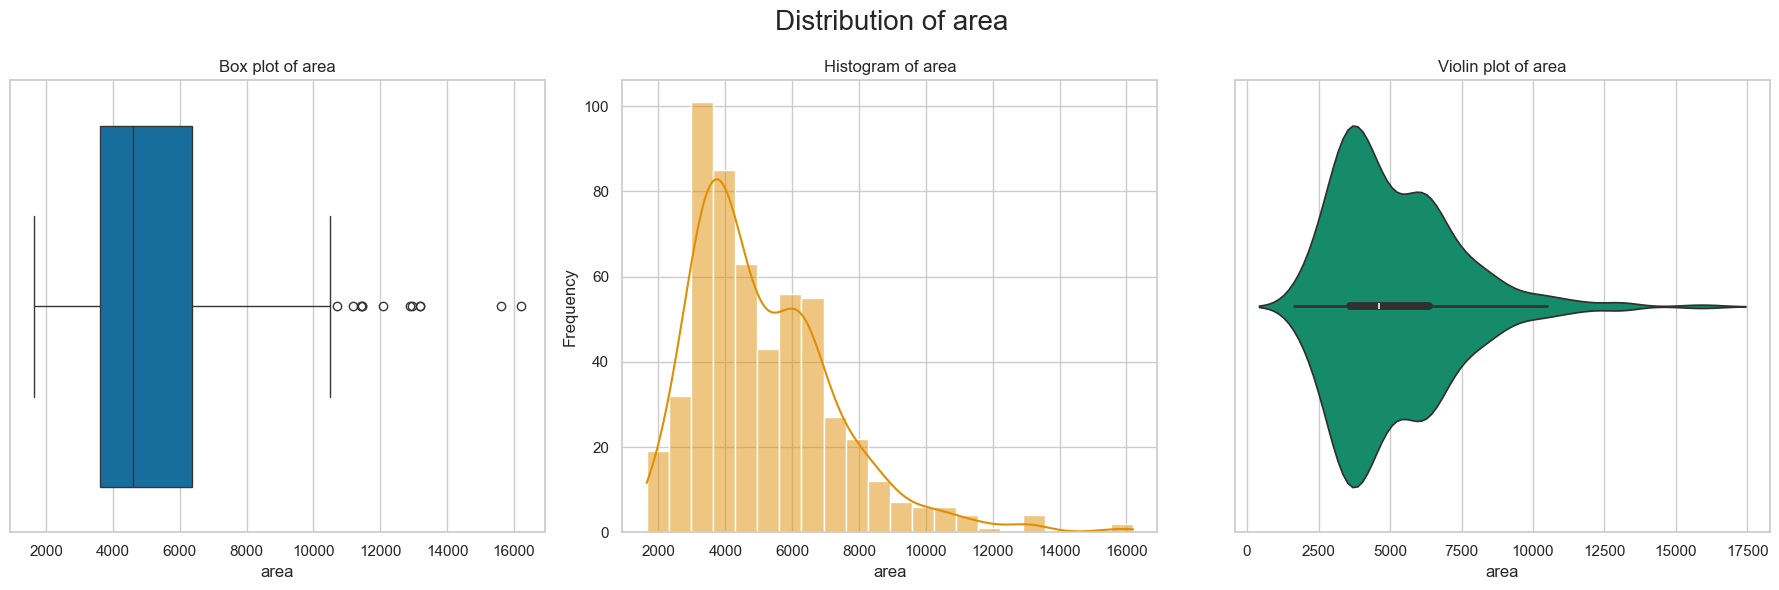

The mean area is: 5150.54128440367
The median area is: 4600.0
The standard deviation of area is: 2170.141022508803


Outliers in the area column (Empty dataframe if none):
(520, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [509]:
single_variable_EDA(df, 'area', 'numerical')

outliers_df = mean_med_std(df, 'area')
df_no_outliers = remove_matching_rows_concat(df_no_outliers, outliers_df)
print(df_no_outliers.shape)
outliers_df

In [510]:
df_no_outliers.shape

(520, 13)

### Bedrooms

- The dataset max # of rooms is 5
- Looks normal distributed with middle value of 3

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


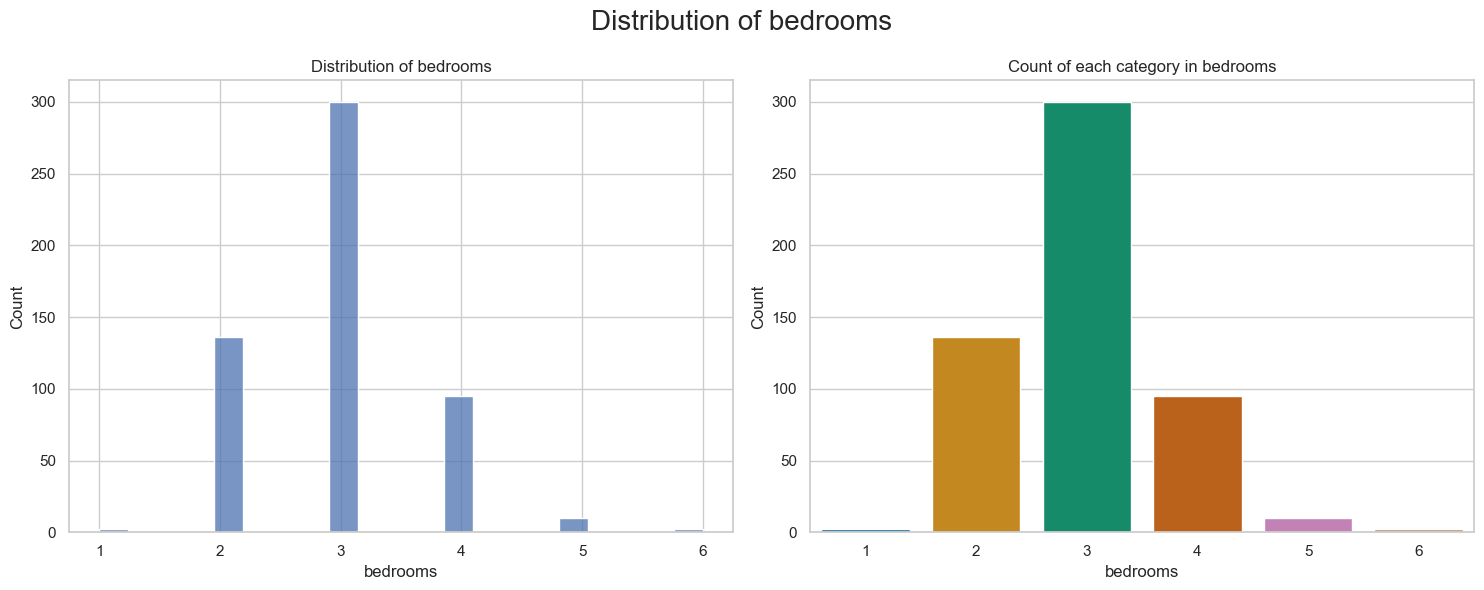

(520, 13) old
The mean bedrooms is: 2.9651376146788992
The median bedrooms is: 3.0
The standard deviation of bedrooms is: 0.7380638605685743


Outliers in the bedrooms column (Empty dataframe if none):
(509, 13) new


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
34,8120000,6840,5,1,2,yes,yes,yes,no,yes,1,no,furnished
89,6440000,8580,5,3,2,yes,no,no,no,no,2,no,furnished
112,6083000,4300,6,2,2,yes,no,no,no,no,0,no,furnished
143,5600000,4800,5,2,3,no,no,yes,yes,no,0,no,unfurnished
152,5565000,5400,5,1,2,yes,yes,yes,no,yes,0,yes,furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
340,3850000,5300,5,2,2,yes,no,no,no,no,0,no,semi-furnished
356,3773000,2520,5,2,1,no,no,yes,no,yes,1,no,furnished


In [511]:
single_variable_EDA(df, 'bedrooms', 'categorical')

print(df_no_outliers.shape, 'old')

outliers_df = mean_med_std(df, 'bedrooms')
df_no_outliers = remove_matching_rows_concat(df_no_outliers, outliers_df)

print(df_no_outliers.shape, 'new')
outliers_df

### Bathrooms

- Most values is: 1
- Somewhat on the low end especially if most houses have 3 bedrooms

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


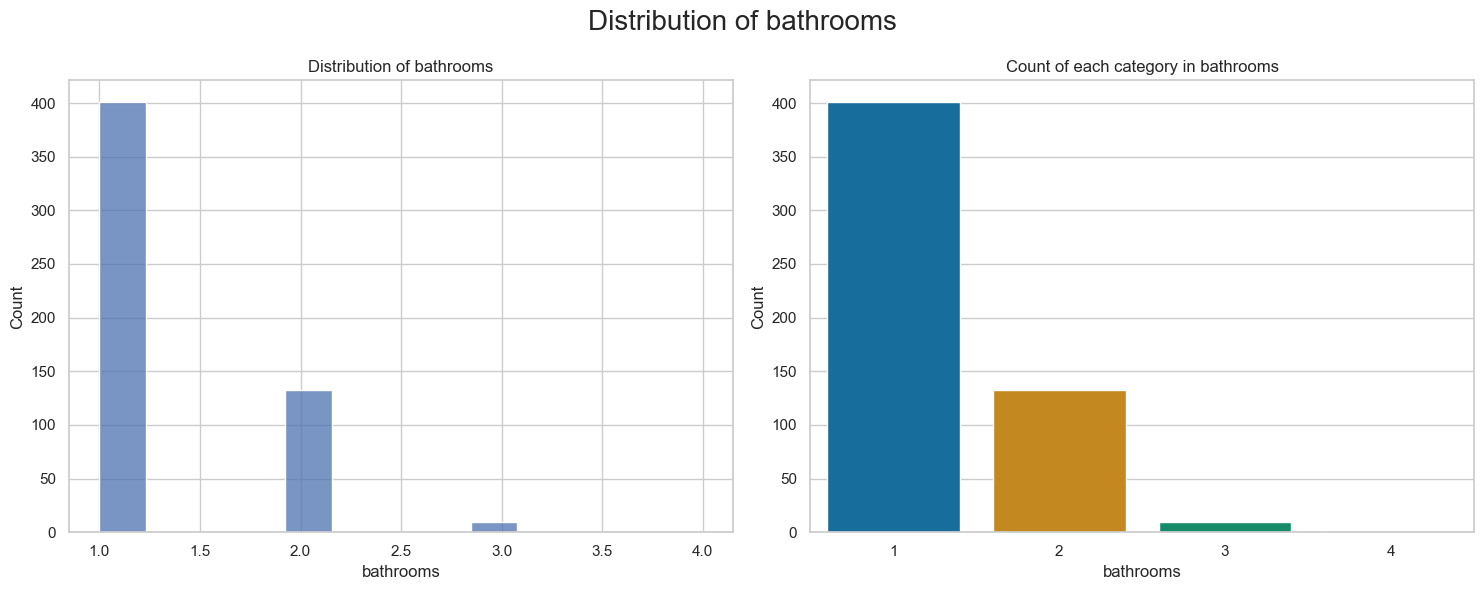

(509, 13) old
The mean bathrooms is: 1.2862385321100918
The median bathrooms is: 1.0
The standard deviation of bathrooms is: 0.5024696160532146


Outliers in the bathrooms column (Empty dataframe if none):
(509, 13) new


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [512]:
single_variable_EDA(df, 'bathrooms', 'categorical')
print(df_no_outliers.shape, 'old')

outliers_df = mean_med_std(df, 'bathrooms')
df_no_outliers = remove_matching_rows_concat(df_no_outliers, outliers_df)

print(df_no_outliers.shape, 'new')
outliers_df

### Stories

- Large majority of houses are 1-2 stories
- Almost equal amount of 3 and 4 story houses


/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


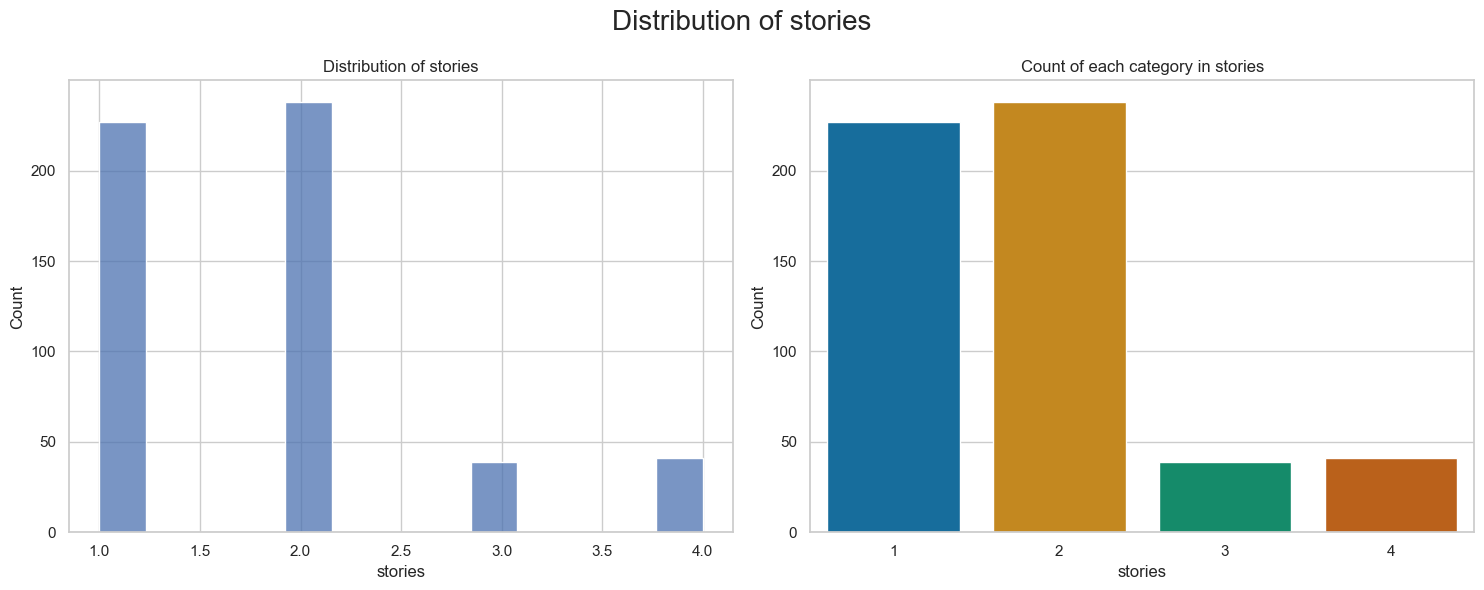

The mean stories is: 1.8055045871559634
The median stories is: 2.0
The standard deviation of stories is: 0.8674924629255264


Outliers in the stories column (Empty dataframe if none):


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished
30,8400000,7475,3,2,4,yes,no,no,no,yes,2,no,unfurnished
31,8400000,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished
35,8080940,7000,3,2,4,yes,no,no,no,yes,2,no,furnished
37,7980000,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished


In [513]:
single_variable_EDA(df, 'stories', 'categorical')

mean_med_std(df, 'stories')
# print(df_no_outliers.shape, 'old')

# outliers_df = mean_med_std(df, 'stories')
# df_no_outliers = remove_matching_rows_concat(df_no_outliers, outliers_df)

# print(df_no_outliers.shape, 'new')
# outliers_df

### Mainroad

- A boolean value if the houses is connected to a mainroad 
- 1 = yes, 2 = no

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


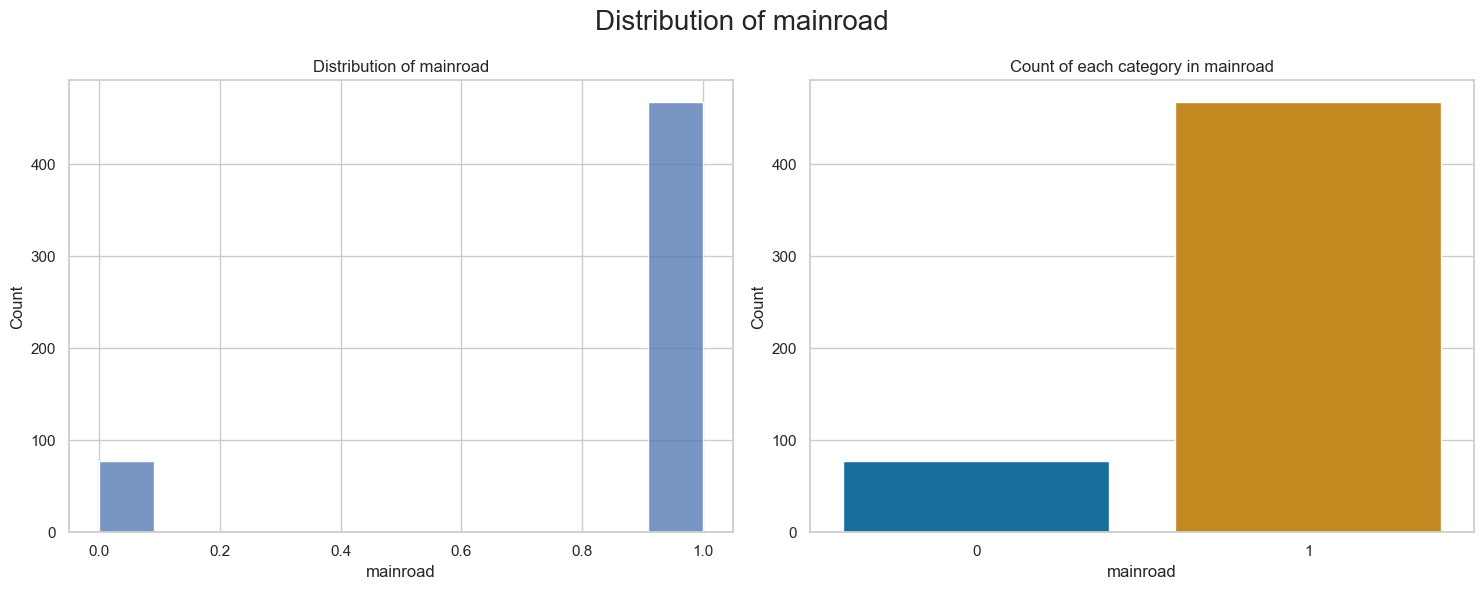

The mean mainroad is: 0.8587155963302753
The median mainroad is: 1.0
The standard deviation of mainroad is: 0.3486346818552864


Outliers in the mainroad column (Empty dataframe if none):


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
143,5600000,4800,5,2,3,0,no,yes,yes,no,0,no,unfurnished
157,5495000,2817,4,2,2,0,yes,yes,no,no,1,no,furnished
169,5250000,6540,4,2,2,0,no,no,no,yes,0,no,semi-furnished
180,5215000,4500,4,2,1,0,no,yes,no,yes,2,no,semi-furnished
182,5145000,3410,3,1,2,0,no,no,no,yes,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2135000,3000,2,1,1,0,no,no,no,no,0,no,unfurnished
536,1960000,3420,5,1,2,0,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,0,no,no,no,no,1,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished


In [514]:
# map yes to 1 and no to 2
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})

single_variable_EDA(df, 'mainroad', 'categorical')
mean_med_std(df, 'mainroad')

### Guestroom

- Whether or not the house has a guest room
- Large majority of houses do not have a guestroom

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


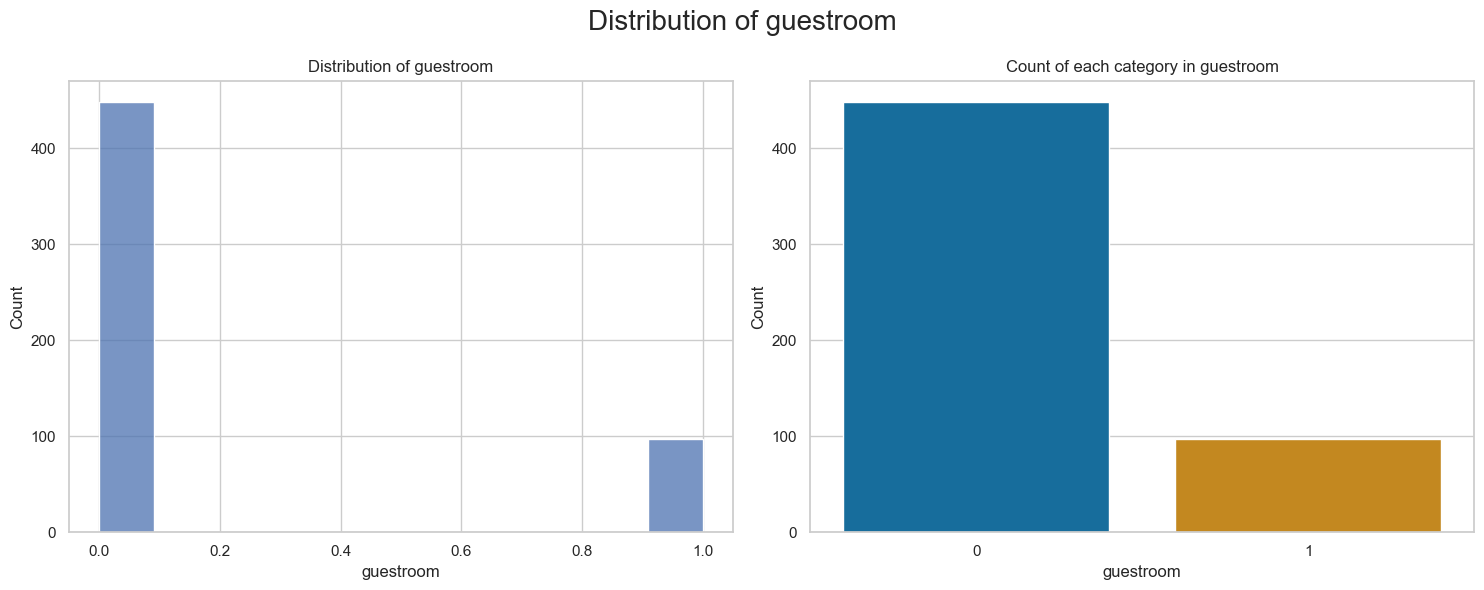

The mean guestroom is: 0.1779816513761468
The median guestroom is: 0.0
The standard deviation of guestroom is: 0.3828486968277535


Outliers in the guestroom column (Empty dataframe if none):


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished
8,9870000,8100,4,1,2,1,1,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,1,1,no,no,yes,1,yes,unfurnished
11,9681000,6000,4,3,2,1,1,yes,yes,no,2,no,semi-furnished
16,9100000,6600,4,2,2,1,1,yes,no,yes,1,yes,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,3150000,3986,2,2,1,0,1,yes,no,no,1,no,unfurnished
463,3080000,3090,2,1,1,1,1,yes,no,no,0,no,unfurnished
499,2660000,3630,3,3,2,0,1,no,no,no,0,no,unfurnished
516,2450000,3240,2,1,1,0,1,no,no,no,1,no,unfurnished


In [515]:
# map yes to 1 and no to 2
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
single_variable_EDA(df, 'guestroom', 'categorical')
mean_med_std(df, 'guestroom')

### Basement

- Whether or not the hosue has a basement
- Most houses do not have a basement but the difference is not too much

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


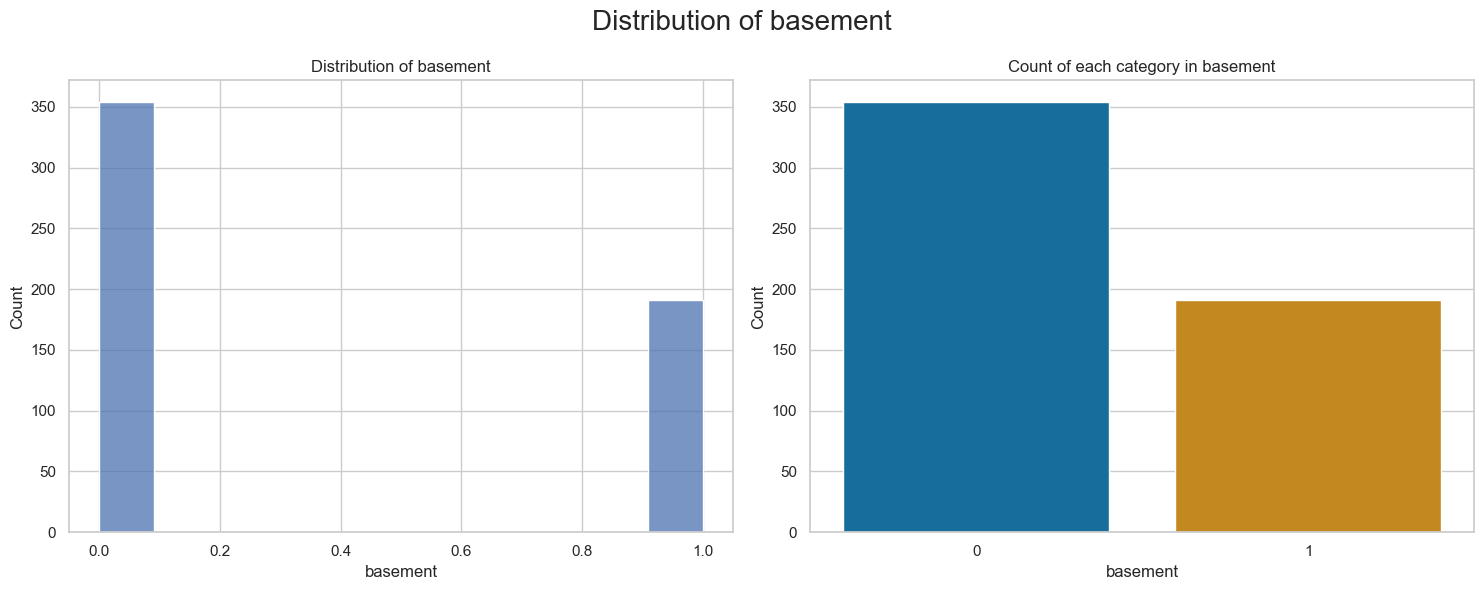

The mean basement is: 0.3504587155963303
The median basement is: 0.0
The standard deviation of basement is: 0.47755193997058665


Outliers in the basement column (Empty dataframe if none):


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [516]:
# map yes to 1 and no to 2
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
single_variable_EDA(df, 'basement', 'categorical')
mean_med_std(df, 'basement')

### Hotwaterheating

- Whether or not the house has a hot water heater
- Most are no, but hot water heaters are vital in a house for bathing, cooking, etc.

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


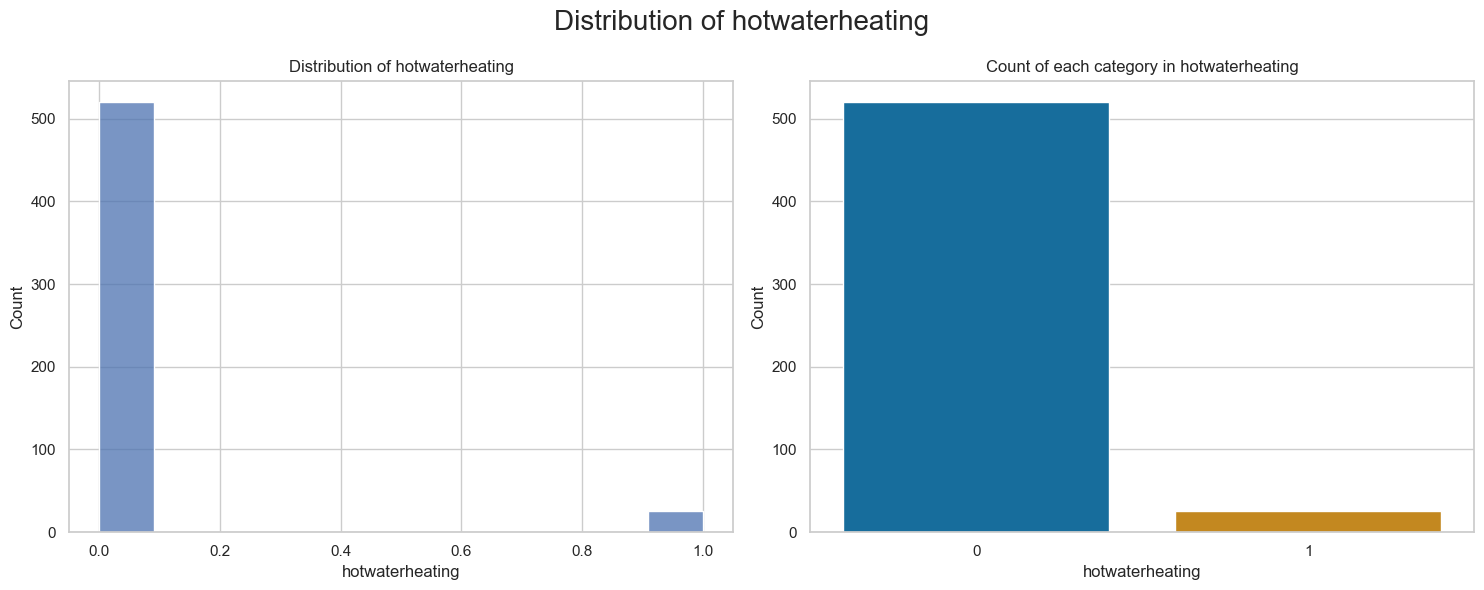

The mean hotwaterheating is: 0.045871559633027525
The median hotwaterheating is: 0.0
The standard deviation of hotwaterheating is: 0.20939869711891673


Outliers in the hotwaterheating column (Empty dataframe if none):


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
11,9681000,6000,4,3,2,1,1,1,1,no,2,no,semi-furnished
13,9240000,3500,4,2,2,1,0,0,1,no,2,no,furnished
20,8750000,4320,3,1,2,1,0,1,1,no,2,no,semi-furnished
28,8400000,7950,5,2,2,1,0,1,1,no,2,no,unfurnished
36,8043000,7482,3,2,3,1,0,0,1,no,1,yes,furnished
66,6930000,13200,2,1,1,1,0,1,1,no,1,no,furnished
74,6650000,4040,3,1,2,1,0,1,1,no,1,no,furnished
75,6650000,4260,4,2,2,1,0,0,1,no,0,no,semi-furnished
80,6629000,6000,3,1,2,1,0,0,1,no,1,yes,semi-furnished
84,6510000,3760,3,1,2,1,0,0,1,no,2,no,semi-furnished


In [517]:
# map yes to 1 and no to 2
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
single_variable_EDA(df, 'hotwaterheating', 'categorical')
mean_med_std(df, 'hotwaterheating')

### Air conditioning

- Whether the house has air conditioning or not
- Most houses do not have air conditioning

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")


/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


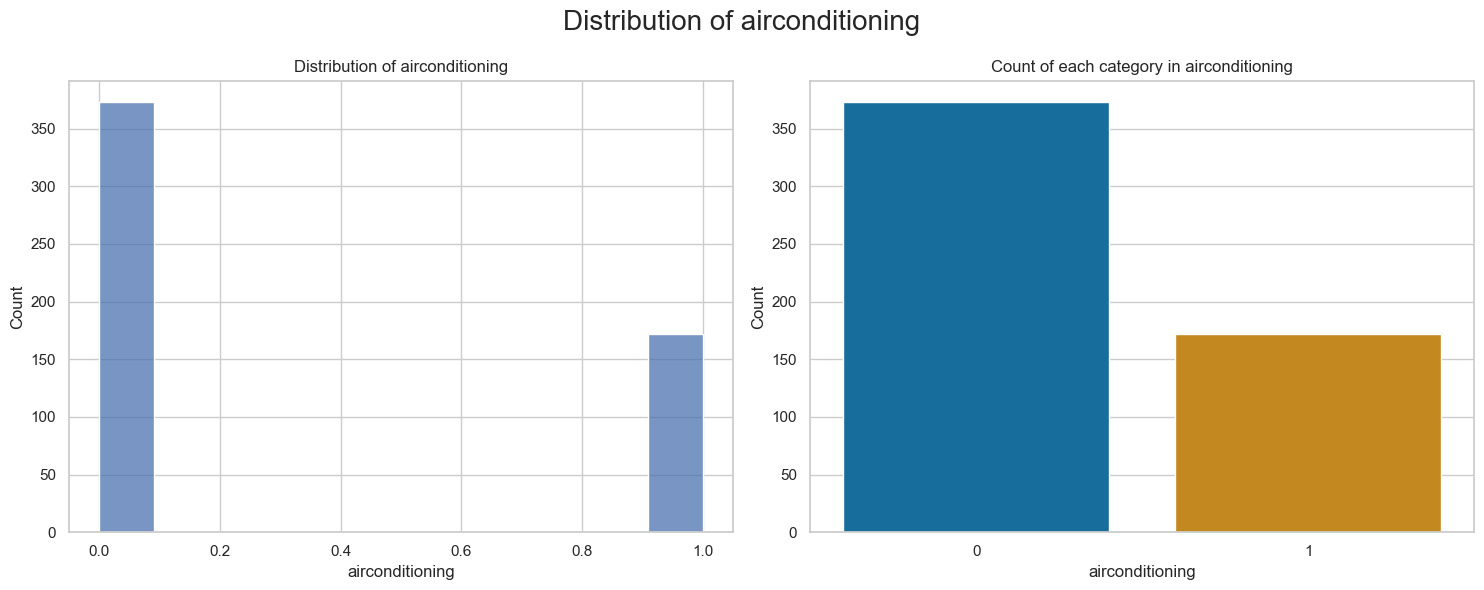

In [518]:
# map yes to 1 and no to 2
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
single_variable_EDA(df, 'airconditioning', 'categorical')

We can probably guess that the houses are not in a very hot state

### Parking

- number of parking spots the house has 
- most houses have no parking which is quite unusual

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


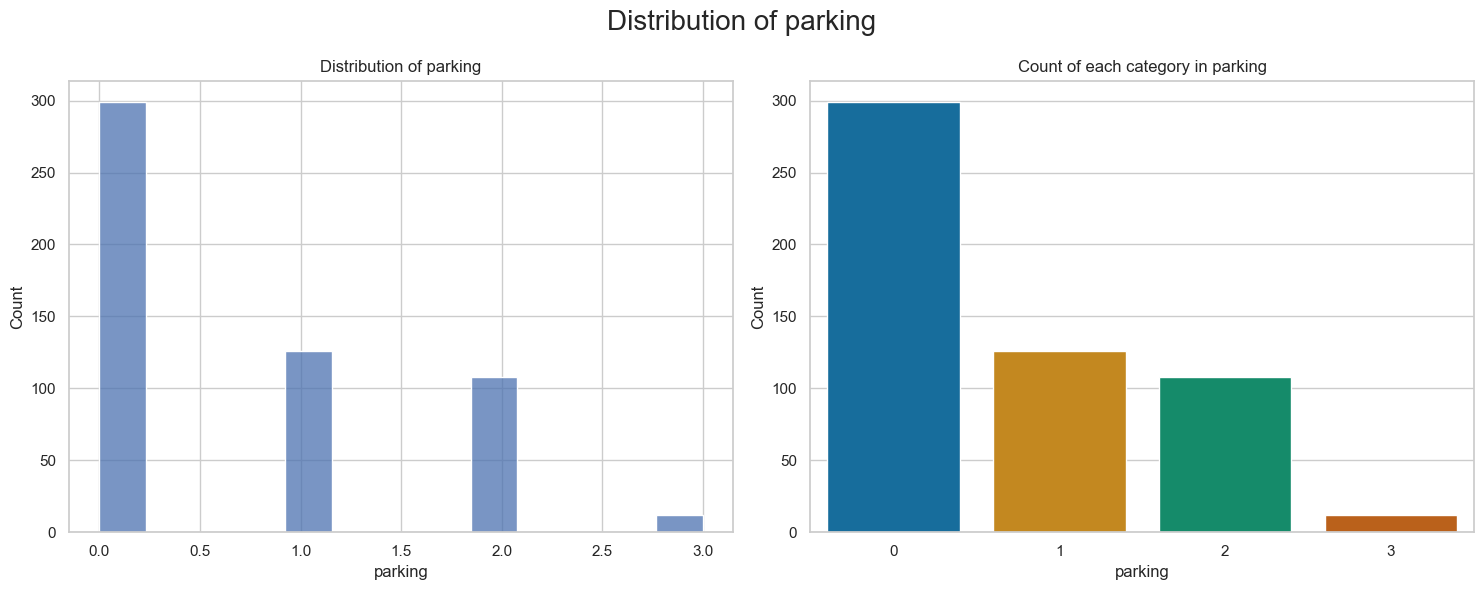

(509, 13) old
The mean parking is: 0.6935779816513762
The median parking is: 0.0
The standard deviation of parking is: 0.8615857504605412


Outliers in the parking column (Empty dataframe if none):
(509, 13) new


In [519]:
single_variable_EDA(df, 'parking', 'categorical')
print(df_no_outliers.shape, 'old')

outliers_df = mean_med_std(df, 'parking')
df_no_outliers = remove_matching_rows_concat(df_no_outliers, outliers_df)

print(df_no_outliers.shape, 'new')

### Prefarea 

- Whether or not the house is in a preferred area
- The house looks like it is not in a good area

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


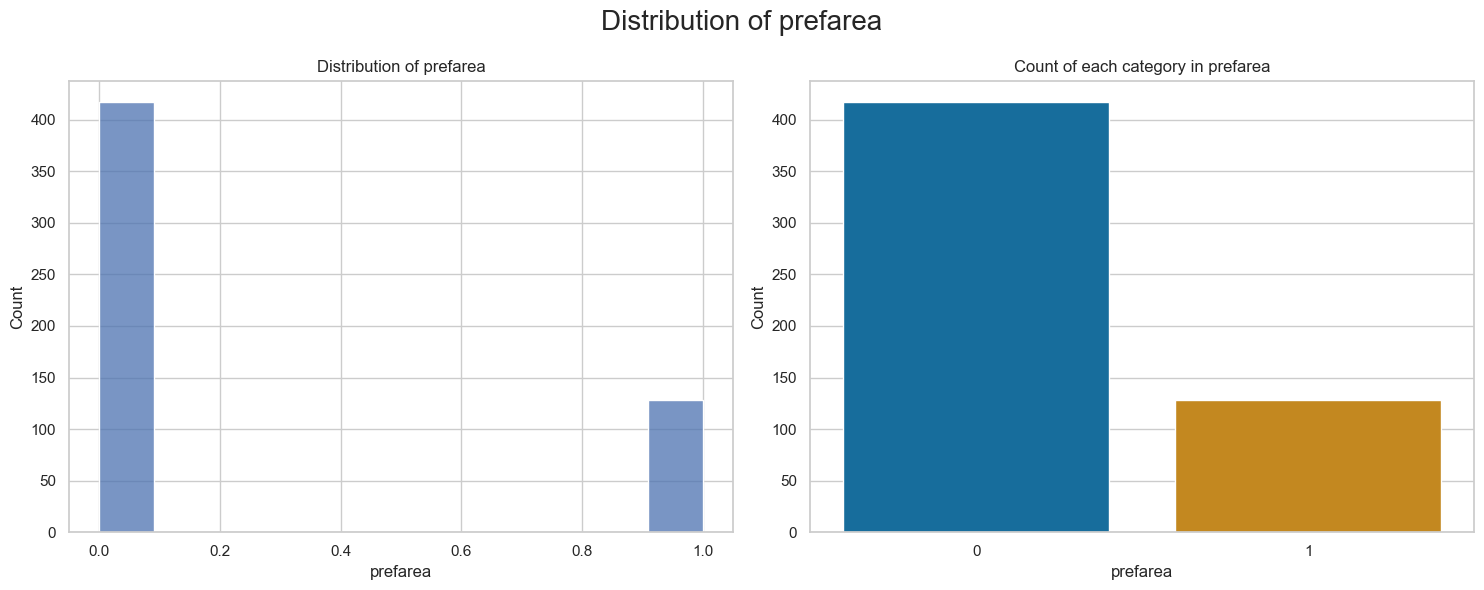

The mean prefarea is: 0.23486238532110093
The median prefarea is: 0.0
The standard deviation of prefarea is: 0.42430222710285986


Outliers in the prefarea column (Empty dataframe if none):


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,1,0,1,0,0,0,1,unfurnished
427,3332000,2145,3,1,2,1,0,1,0,0,0,1,furnished
436,3290000,2145,3,1,2,1,0,1,0,0,0,1,furnished
456,3118850,2398,3,1,1,1,0,0,0,0,0,1,semi-furnished


In [520]:
# map yes to 1 and no to 2
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
single_variable_EDA(df, 'prefarea', 'categorical')
mean_med_std(df, 'prefarea')

### Furnishingstatus

- furnishing status of the house
- furnishing status is roughly equal for all with a peak in semi-furnished

/Users/andrewchen/Projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/andrewchen/Projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette="colorblind")


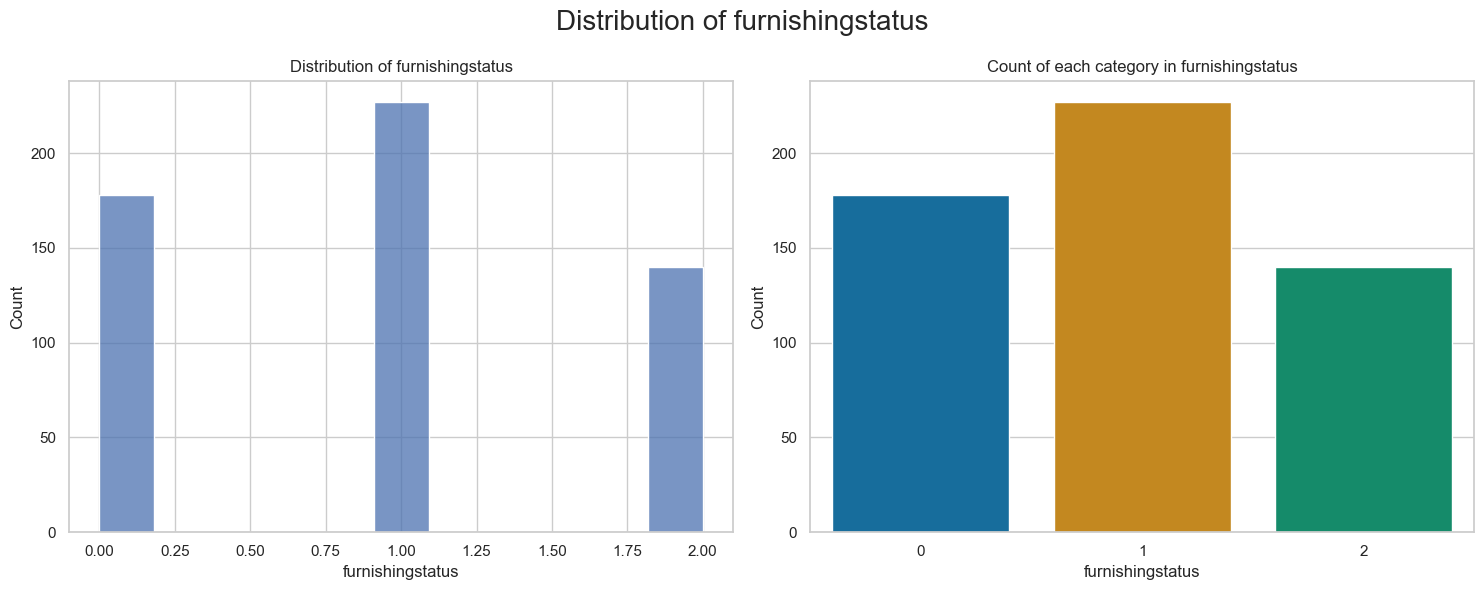

The mean furnishingstatus is: 0.9302752293577982
The median furnishingstatus is: 1.0
The standard deviation of furnishingstatus is: 0.7613726703968295


Outliers in the furnishingstatus column (Empty dataframe if none):


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [521]:
# map semi-furnished to 1, unfurnished to 2 and other to 3
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
single_variable_EDA(df, 'furnishingstatus', 'categorical')
mean_med_std(df, 'furnishingstatus')
#df['furnishingstatus'].value_counts()

## Pairwise EDA

In [522]:
# sns.pairplot(df)

#### Looks like only area is the only visible indicator 

In [523]:
correlation_comparison(df, 'price')

Correlation of all columns with 'price':

The column with the biggest correlation with 'price' is 'area' with a correlation of: 0.5359973457780801



{'area': 0.5359973457780801,
 'bathrooms': 0.5175453394550115,
 'airconditioning': 0.45295408425604866,
 'stories': 0.4207123661886168,
 'parking': 0.3843936486357261,
 'bedrooms': 0.3664940257738684,
 'prefarea': 0.3297770498681074,
 'furnishingstatus': 0.3047214615374343,
 'mainroad': 0.29689848926397633,
 'guestroom': 0.2555172899350004,
 'basement': 0.18705659793805288,
 'hotwaterheating': 0.093072843921397}

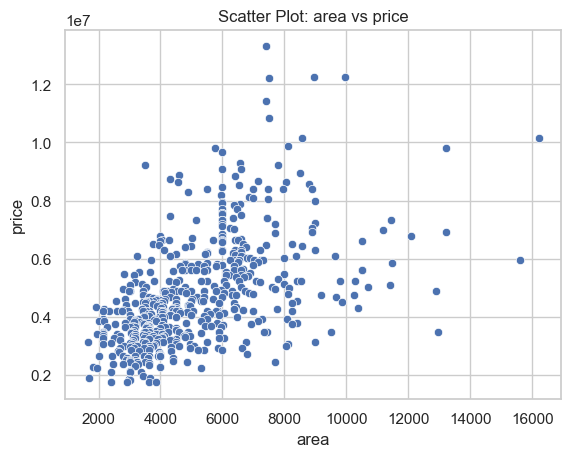

Correlation is 0.5359973457780801


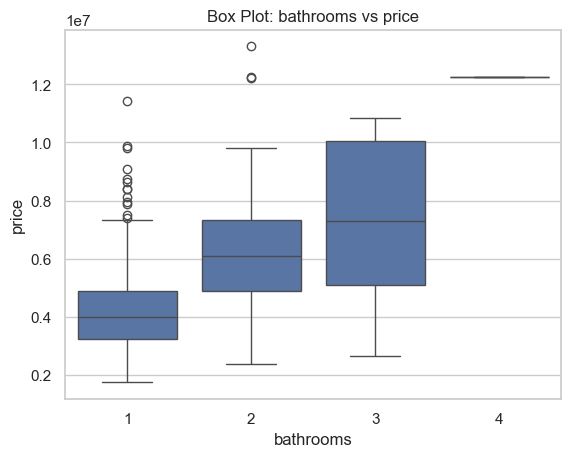

Correlation is 0.5175453394550115


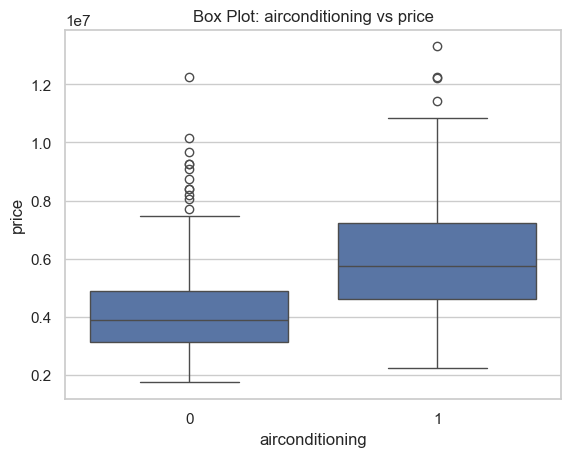

Correlation is 0.45295408425604866


In [524]:
pairwise_eda(df, 'area', 'price', 'num2num')
pairwise_eda(df, 'bathrooms', 'price', 'cat2num')
pairwise_eda(df, 'airconditioning', 'price', 'cat2num')

### Mapping for df_no_outliers

In [525]:
df_no_outliers['mainroad'] = df_no_outliers['mainroad'].map({'yes': 1, 'no': 0})
df_no_outliers['guestroom'] = df_no_outliers['guestroom'].map({'yes': 1, 'no': 0})
df_no_outliers['basement'] = df_no_outliers['basement'].map({'yes': 1, 'no': 0})
df_no_outliers['hotwaterheating'] = df_no_outliers['hotwaterheating'].map({'yes': 1, 'no': 0})
df_no_outliers['airconditioning'] = df_no_outliers['airconditioning'].map({'yes': 1, 'no': 0})
df_no_outliers['prefarea'] = df_no_outliers['prefarea'].map({'yes': 1, 'no': 0})
df_no_outliers['furnishingstatus'] = df_no_outliers['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

## Feature Engineering

- Total rooms = bedroom + bathroom + guestroom
- Room per story = # rooms / stories 
- luxury index = guestroom, airconditioning, prefarea, basement

In [526]:
# df['totalrooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']
# df['area_per_room'] = df['area'] / df['totalrooms']
# df['rooms_per_story'] = df['totalrooms'] / df['stories']
# df['luxury_index'] = df['guestroom'] + df['airconditioning'] + df['prefarea'] + df['basement']
# df['roomsratio'] = df['bedrooms'] / df['bathrooms']

# # do the same but for df_no_outliers
# df_no_outliers['totalrooms'] = df_no_outliers['bedrooms'] + df_no_outliers['bathrooms'] + df_no_outliers['guestroom']
# df_no_outliers['area_per_room'] = df_no_outliers['area'] / df_no_outliers['totalrooms']
# df_no_outliers['rooms_per_story'] = df_no_outliers['totalrooms'] / df_no_outliers['stories']
# df_no_outliers['luxury_index'] = df_no_outliers['guestroom'] + df_no_outliers['airconditioning'] + df_no_outliers['prefarea'] + df_no_outliers['basement']
# df_no_outliers['roomsratio'] = df_no_outliers['bedrooms'] / df_no_outliers['bathrooms']



In [527]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


## Model Part: Outliers Removed


In [528]:
import statsmodels.api as sm
x = df_no_outliers.drop(columns=['price'])
y = df_no_outliers['price']

real_x = df.drop(columns=['price'])
real_y = df['price']

In [529]:
from sklearn.model_selection import train_test_split

x_train_no, x_test_no, y_train_no, y_test_no = train_test_split(x, y, test_size=0.2, random_state=42)
real_x_train, real_x_test, real_y_train, real_y_test = train_test_split(real_x, real_y, test_size=0.2, random_state=42)

In [530]:
x_train_no = sm.add_constant(x_train_no) # Add this line to align the indices

# real_x_train = sm.add_constant(real_x_train)

model = sm.OLS(y_train_no, x_train_no).fit() # learn with no outliers df
model.summary()

# R^2 is percentage of variance explained by the model. Model explains 64.5% of the variance in the data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     59.75
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           6.15e-81
Time:                        13:05:10   Log-Likelihood:                -6169.3
No. Observations:                 407   AIC:                         1.236e+04
Df Residuals:                     394   BIC:                         1.242e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.259e+05   2.67e+05      1.223      0.222   -1.98e+05     8.5e+05
area               240.3203     30.711      7.825      0.000     179.943     300.698
bedrooms          2.979e+04    8.4e+04      0.354      0.723   -1.35e+05    1.95e+05
bathrooms         8.284e+05   1.13e+05      7.312      0.000    6.06e+05    1.05e+06
stories            4.11e+05   6.79e+04      6.049      0.000    2.77e+05    5.45e+05
mainroad          4.298e+05   1.41e+05      3.046      0.002    1.52e+05    7.07e+05
guestroom         3.811e+05   1.39e+05      2.748      0.006    1.08e+05    6.54e+05
basement           3.42e+05   1.13e+05      3.023      0.003     1.2e+05    5.64e+05
hotwaterheating   5.937e+05   2.37e+05      2.501      0.013    1.27e+05    1.06e+06
airconditioning   8.444e+05   1.15e+05      7.361      0.000    6.19e+05    1.07e+06
parking           1.532e+05    6.1e+04      2.511      0.012    3.32e+04    2.73e+05
prefarea          4.453e+05   1.21e+05      3.683      0.000    2.08e+05    6.83e+05
furnishingstatus  2.109e+05    6.4e+04      3.293      0.001     8.5e+04    3.37e+05
==============================================================================
Omnibus:                       29.586   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.151
Skew:                           0.490   Prob(JB):                     3.50e-11
Kurtosis:                       4.371   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [531]:
x_test_no = sm.add_constant(x_test_no)

#real_x_test = sm.add_constant(real_x_test)
#real_y_pred = model.predict(real_x_test) # predict with the original df

y_pred_no = model.predict(x_test_no) 

from sklearn.metrics import mean_squared_error

#np.sqrt(mean_squared_error(real_y_test, real_y_pred))
np.sqrt(mean_squared_error(y_test_no, y_pred_no))

# After feature engineering, root mse: 932,028.102
# Before feature engineering, root mse: 924,780.811 , R^2: 0.645

924780.8119422576

## Drop non-significant columns

In [532]:
features_to_remove = ['bedrooms']
x_train_no = x_train_no.drop(columns=features_to_remove)
x_test_no = x_test_no.drop(columns=features_to_remove)

model = sm.OLS(y_train_no, x_train_no).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     65.31
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           7.90e-82
Time:                        13:05:10   Log-Likelihood:                -6169.4
No. Observations:                 407   AIC:                         1.236e+04
Df Residuals:                     395   BIC:                         1.241e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.846e+05   2.09e+05      1.844      0.066   -2.55e+04    7.95e+05
area               240.7765     30.650      7.856      0.000     180.519     301.034
bathrooms         8.362e+05   1.11e+05      7.531      0.000    6.18e+05    1.05e+06
stories           4.203e+05   6.25e+04      6.724      0.000    2.97e+05    5.43e+05
mainroad          4.236e+05    1.4e+05      3.029      0.003    1.49e+05    6.99e+05
guestroom         3.807e+05   1.39e+05      2.748      0.006    1.08e+05    6.53e+05
basement          3.463e+05   1.12e+05      3.082      0.002    1.25e+05    5.67e+05
hotwaterheating   5.907e+05   2.37e+05      2.493      0.013    1.25e+05    1.06e+06
airconditioning   8.454e+05   1.15e+05      7.379      0.000     6.2e+05    1.07e+06
parking           1.557e+05   6.05e+04      2.572      0.010    3.67e+04    2.75e+05
prefarea          4.492e+05    1.2e+05      3.736      0.000    2.13e+05    6.86e+05
furnishingstatus  2.116e+05   6.39e+04      3.310      0.001    8.59e+04    3.37e+05
==============================================================================
Omnibus:                       29.922   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.020
Skew:                           0.492   Prob(JB):                     2.27e-11
Kurtosis:                       4.386   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [533]:
x_test_no = sm.add_constant(x_test_no)
y_pred_no = model.predict(x_test_no)

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test_no, y_pred_no))

926909.9031070804

# Final Notes

- I didn't drop outliers in stories bc I felt that was too many entries
- Did not drop mainroad as there was too many